In [1]:
import pandas as pd
import numpy as np

## Crear taxonomía

In [ ]:
conocer = [
    "Adquirir", "Anotar", "Citar", "Decir", "Definir", "Detallar", "Distinguir", "Enlistar", "Enumerar", "Enunciar", "Escribir", "Exhibir", "Exponer", "Expresar", "Identificar", "Indicar", "Marcar", "Membretar", "Nombrar", "Mostrar", "Narrar", "Reconocer", "Recordar", "Referir", "Registrar", "Relatar", "Repetir", "Señalar", "Subrayar"
]

comprender = [
    "Argumentar", "Cambiar", "Codificar", "Completar", "Comprender", "Concretar", "Convertir", "Decir (con sus palabras)", "Decodificar", "Definir (con sus palabras)", "Demostrar", "Derivar", "Describir", "Determinar", "Diferenciar", "Distinguir", "Ejemplificar", "Establecer", "Estimar", "Explicar", "Exponer", "Extender", "Extrapolar", "Formular", "Generalizar", "Identificar", "Inducir", "Inferir", "Interpolar", "Leer", "Narrar", "Opinar", "Organizar", "Parafrasear", "Predecir", "Redefinir", "Redisponer", "Relacionar", "Reorganizar", "Representar", "Rescribir", "Resumir", "Traducir", "Transformar"
]

aplicar = [
    "Actuar", "Aplicar", "Aprovechar", "Clasificar", "Computar", "Decir", "Demostrar", "Discriminar", "Dramatizar", "Elegir", "Emplear", "Enlazar", "Explicar", "Exponer", "Generalizar", "Ilustrar", "Localizar", "Interpretar", "Manejar", "Mostrar", "Operar", "Practicar", "Producir", "Representar", "Resolver", "Seleccionar", "Transferir", "Trazar", "Usar", "Utilizar"
]

analizar = [
    "Abstraer", "Aislar", "Analizar", "Clasificar", "Comparar", "Contrastar", "Decidir", "Deducir", "Derivar", "Desarmar", "Descomponer", "Describir", "Descubrir", "Desglosar", "Detallar", "Detectar", "Diferenciar", "Discriminar", "Distinguir", "Dividir", "Especificar", "Examinar", "Fraccionar", "Identificar", "Localizar", "Omitir", "Relacionar", "Seccionar", "Seleccionar"
]

evaluar = [
    "Argumentar", "Categorizar", "Clasificar", "Comparar", "Comprobar", "Conceptuar", "Concluir", "Considerar", "Constatar", "Contrastar", "Criticar", "Decidir", "Demostrar", "Determinar", "Elegir", "Escoger", "Establecer", "Estandarizar", "Estimar", "Estudiar", "Evaluar", "Fundamentar", "Justificar", "Justipreciar", "Juzgar", "Medir", "Observar", "Opinar", "Predecir", "Precisar", "Probar", "Reconocer", "Revisar", "Seleccionar", "Sustentar", "Trazar", "Verificar", "Valorar"
]

crear = [
    "Agrupar", "Clasificar", "Combinar", "Componer", "Compilar", "Concebir", "Confeccionar", "Construir", "Crear", "Descubrir", "Diseñar", "Distribuir", "Ejecutar", "Elaborar", "Ensamblar", "Esquematizar", "Especificar", "Establecer", "Estructurar", "Explicar", "Exponer", "Expresar", "Formar", "Formular", "Fundar", "Generar", "Idear", "Implantar", "Improvisar", "Instituir", "Instaurar", "Inventar", "Inventariar", "Investigar", "Modificar", "Narrar", "Organizar", "Originar", "Planear", "Producir", "Programar", "Proponer", "Proyectar", "Reconstruir", "Reacomodar", "Relatar", "Relacionar", "Realizar", "Reorganizar", "Reparar", "Simplificar", "Transmitir", "Variar"
]

taxonomia = {
    "Conocer": conocer,
    "Comprender": comprender,
    "Aplicar": aplicar,
    "Analizar": analizar,
    "Evaluar": evaluar,
    "Crear": crear
}


In [ ]:
df_indicadores = pd.read_csv('Datos/df_indicadores.csv')
df_indicadores.head()

In [ ]:
# vamos a crear 5 columnas nuevas de la taxonomía de Bloom
# para cada fila, tendremos las 5 columnas de la taxonomía
# agruparemos los indicadores por taxonomía y los pondremos en una sola columna

indicadores = df_indicadores.columns[1:] # sin considerar la columna "RUT"
cols_taxonomia = { tax : [] for tax in taxonomia.keys() } # inicializamos las columnas de taxonomía
for indicador in indicadores:
    for key, values in taxonomia.items():
        indicador_limpio = indicador.lower()
        values_limpio = [v.lower() for v in values]
        if any(value in indicador_limpio for value in values_limpio):  # si el indicador contiene alguna palabra clave de la taxonomía
            cols_taxonomia[key].append(indicador) # agregamos el nombre del indicador correspondiente

dict_taxonomia = {}

for index, row in df_indicadores.iterrows():
    puntajes_taxonomia = {}
    for tax, indicators in cols_taxonomia.items():
        puntajes_taxonomia[tax] = row[indicators].mean() if indicators else 0  # promediar los puntajes de los indicadores correspondientes
    dict_taxonomia[row["rut"]] = puntajes_taxonomia

# Convertir el diccionario a un DataFrame
df_taxonomia = pd.DataFrame.from_dict(dict_taxonomia, orient='index').reset_index()
df_taxonomia.rename(columns={'index': 'rut'}, inplace=True)
# Reordenar las columnas para que aparezcan en el orden deseado
df_taxonomia = df_taxonomia[["rut"] + list(taxonomia.keys())]
df_taxonomia.head()


In [5]:
df_taxonomia.to_csv('Datos/df_taxonomia.csv', index=False)  # Guardar el DataFrame en un archivo CSV

## Procesar datos

In [22]:
df_indicadores = pd.read_csv('Datos/df_indicadores.csv')
df_sepa = pd.read_csv('Datos/df_pruebas_sepa.csv')
df_paes = pd.read_excel('Datos/paes_encrypted.xlsx', skiprows=1)

# mergear df_paes (RUT) con df_sepa (sudent_rut)
df = df_sepa.merge(df_paes, left_on='student_rut', right_on='RUT', how='inner')
df.replace('-', np.nan, inplace=True)
df = df.astype({'C. Lectora': 'float', 'Matemática': 'float', 'Historia': 'float', 'Ciencias': 'float', 'M2': 'float'})
df.drop(columns=['student_rut'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          324 non-null    int64  
 1   mat_1       324 non-null    float64
 2   mat_2       324 non-null    float64
 3   mat_3       324 non-null    float64
 4   mat_4       324 non-null    float64
 5   mat_5       324 non-null    float64
 6   mat_6       324 non-null    float64
 7   mat_7       324 non-null    float64
 8   mat_8       324 non-null    float64
 9   mat_9       324 non-null    float64
 10  mat_10      324 non-null    float64
 11  mat_11      324 non-null    float64
 12  mat_12      324 non-null    float64
 13  leng_1      324 non-null    float64
 14  leng_2      324 non-null    float64
 15  leng_3      324 non-null    float64
 16  leng_4      324 non-null    float64
 17  leng_5      324 non-null    float64
 18  leng_6      324 non-null    float64
 19  leng_7      324 non-null    f

In [ ]:
df_taxonomia.replace(np.nan, 0, inplace=True)  # Reemplazar NaN por 0

df = df.merge(df_taxonomia, left_on='RUT', right_on='rut', how='inner')
df.drop(columns=['rut'], inplace=True)  # Eliminar la columna 'rut' ya que no es necesaria
df.head()

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt

## Predecir C. Lectora

In [42]:
df_datos = df.drop(columns=['id', 'Nombre', 'Admisión', 'Matemática', 'Historia', 'Ciencias', 'M2']).copy()
print(f"Cantidad de filas antes de eliminar NaN: {df_datos.shape[0]}")
df_datos.dropna(inplace=True)  # eliminar filas con NaN
print(f"Cantidad de filas después de eliminar NaN: {df_datos.shape[0]}")

X = df_datos.drop(columns=['RUT', 'C. Lectora'])
y = df_datos['C. Lectora']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Cantidad de filas antes de eliminar NaN: 323
Cantidad de filas después de eliminar NaN: 322
X_train shape: (257, 30), y_train shape: (257,)
X_test shape: (65, 30), y_test shape: (65,)


In [30]:

modelos = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Bayesiana': BayesianRidge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP (Neural Net)': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    resultados.append({
        'Modelo': nombre,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 3)
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                Modelo   RMSE     R²
0     Regresión Lineal  73.22  0.371
1  Regresión Bayesiana  70.46  0.418
2        Random Forest  73.27  0.370
3    Gradient Boosting  74.38  0.351
4     MLP (Neural Net)  82.44  0.203
5                Ridge  70.62  0.415


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


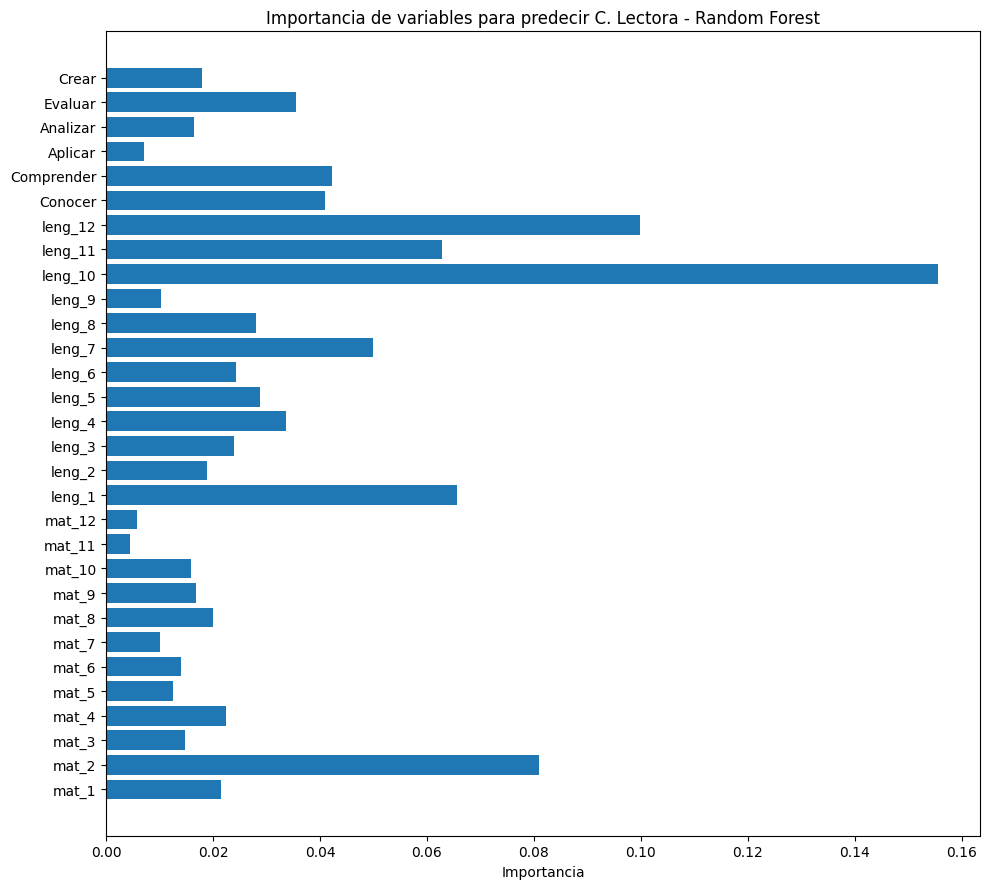

In [31]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = df_datos.drop(columns=['RUT', 'C. Lectora']).columns.tolist()

plt.figure(figsize=(10, len(feature_names)*0.3))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de variables para predecir C. Lectora - Random Forest")
plt.tight_layout()
plt.show()

In [46]:
# finetuneo del modelo Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': ['sqrt', 'log2']
}
rf_grid = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
print(f"RMSE del mejor modelo Random Forest: {rmse_best:.2f}")
print(f"R² del mejor modelo Random Forest: {r2_best:.3f}")

Mejores parámetros encontrados:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE del mejor modelo Random Forest: 70.80
R² del mejor modelo Random Forest: 0.412


In [50]:
# fintetuneo del modelo Bayesian Ridge
from sklearn.model_selection import RandomizedSearchCV
param_grid_bayesian = {
    'alpha_1': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'alpha_2': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'lambda_1': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'lambda_2': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}
bayesian_grid = BayesianRidge()
random_search = GridSearchCV(estimator=bayesian_grid, param_grid=param_grid_bayesian, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=0)
random_search.fit(X_train, y_train)
print("Mejores parámetros encontrados para Bayesian Ridge:")
print(random_search.best_params_)
best_bayesian = random_search.best_estimator_
y_pred_bayesian = best_bayesian.predict(X_test)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
r2_bayesian = r2_score(y_test, y_pred_bayesian)
print(f"RMSE del mejor modelo Bayesian Ridge: {rmse_bayesian:.2f}")
print(f"R² del mejor modelo Bayesian Ridge: {r2_bayesian:.3f}")

Mejores parámetros encontrados para Bayesian Ridge:
{'alpha_1': 1e-06, 'alpha_2': 0.01, 'lambda_1': 0.01, 'lambda_2': 1e-06, 'tol': 0.1}
RMSE del mejor modelo Bayesian Ridge: 70.46
R² del mejor modelo Bayesian Ridge: 0.418


## Predecir Matemáticas

In [51]:
df_datos = df.drop(columns=['id', 'Nombre', 'Admisión', 'C. Lectora', 'Historia', 'Ciencias', 'M2']).copy()
print(f"Cantidad de filas antes de eliminar NaN: {df_datos.shape[0]}")
df_datos.dropna(inplace=True)  # eliminar filas con NaN
print(f"Cantidad de filas después de eliminar NaN: {df_datos.shape[0]}")

X = df_datos.drop(columns=['RUT', 'Matemática'])
y = df_datos['Matemática']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Cantidad de filas antes de eliminar NaN: 323
Cantidad de filas después de eliminar NaN: 322
X_train shape: (257, 30), y_train shape: (257,)
X_test shape: (65, 30), y_test shape: (65,)


In [33]:

modelos = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Bayesiana': BayesianRidge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP (Neural Net)': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    resultados.append({
        'Modelo': nombre,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 3)
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                Modelo   RMSE     R²
0     Regresión Lineal  87.38  0.512
1  Regresión Bayesiana  87.69  0.509
2        Random Forest  92.10  0.458
3    Gradient Boosting  96.52  0.405
4     MLP (Neural Net)  98.64  0.379
5                Ridge  87.18  0.515


/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


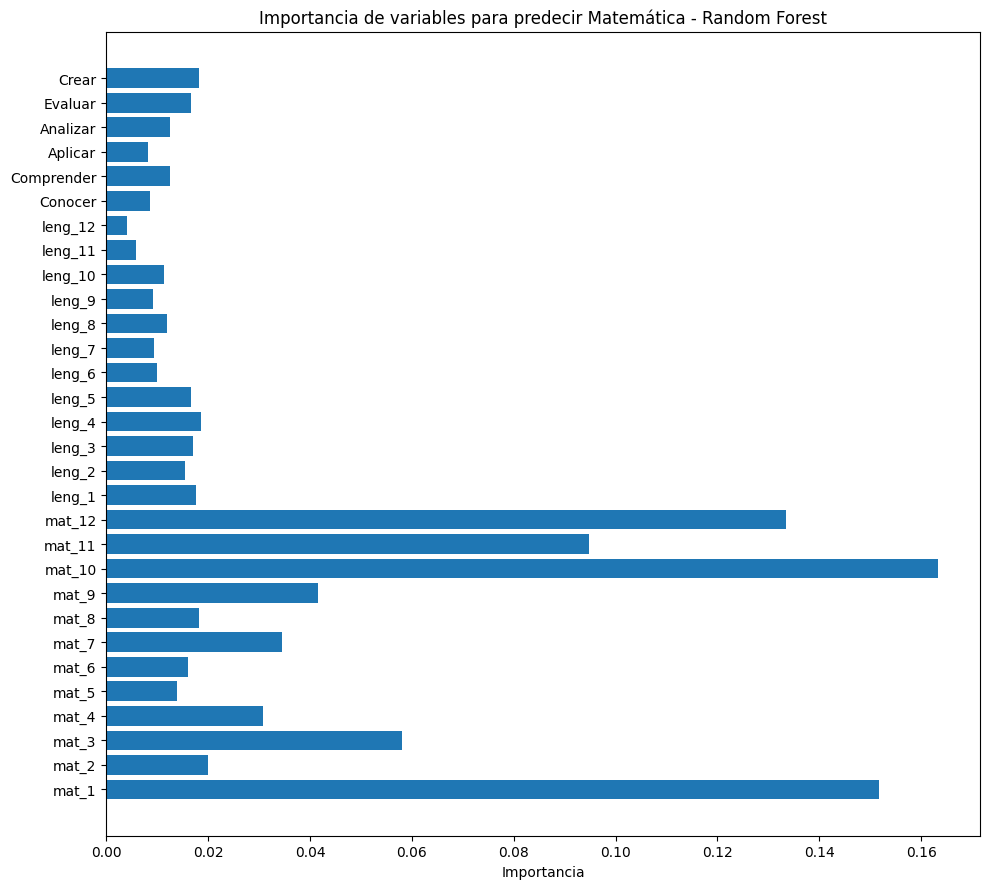

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = df_datos.drop(columns=['RUT', 'Matemática']).columns.tolist()

plt.figure(figsize=(10, len(feature_names)*0.3))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de variables para predecir Matemática - Random Forest")
plt.tight_layout()
plt.show()

In [52]:
# finetuneo del modelo Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5],
    'max_features': ['sqrt', 'log2']
}
rf_grid = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
print(f"RMSE del mejor modelo Random Forest: {rmse_best:.2f}")
print(f"R² del mejor modelo Random Forest: {r2_best:.3f}")

Mejores parámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RMSE del mejor modelo Random Forest: 95.71
R² del mejor modelo Random Forest: 0.415


In [53]:
# fintetuneo del modelo Bayesian Ridge
from sklearn.model_selection import RandomizedSearchCV
param_grid_bayesian = {
    'alpha_1': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'alpha_2': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'lambda_1': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'lambda_2': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}
bayesian_grid = BayesianRidge()
random_search = GridSearchCV(estimator=bayesian_grid, param_grid=param_grid_bayesian, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=0)
random_search.fit(X_train, y_train)
print("Mejores parámetros encontrados para Bayesian Ridge:")
print(random_search.best_params_)
best_bayesian = random_search.best_estimator_
y_pred_bayesian = best_bayesian.predict(X_test)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
r2_bayesian = r2_score(y_test, y_pred_bayesian)
print(f"RMSE del mejor modelo Bayesian Ridge: {rmse_bayesian:.2f}")
print(f"R² del mejor modelo Bayesian Ridge: {r2_bayesian:.3f}")

Mejores parámetros encontrados para Bayesian Ridge:
{'alpha_1': 1e-06, 'alpha_2': 0.01, 'lambda_1': 0.01, 'lambda_2': 1e-06, 'tol': 0.1}
RMSE del mejor modelo Bayesian Ridge: 87.69
R² del mejor modelo Bayesian Ridge: 0.509


## Predecir Ciencias

In [35]:
df_datos = df.drop(columns=['id', 'Nombre', 'Admisión', 'Matemática', 'Historia', 'C. Lectora', 'M2']).copy()
print(f"Cantidad de filas antes de eliminar NaN: {df_datos.shape[0]}")
df_datos.dropna(inplace=True)  # eliminar filas con NaN
print(f"Cantidad de filas después de eliminar NaN: {df_datos.shape[0]}")

X = df_datos.drop(columns=['RUT', 'Ciencias'])
y = df_datos['Ciencias']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Cantidad de filas antes de eliminar NaN: 323
Cantidad de filas después de eliminar NaN: 152
X_train shape: (121, 30), y_train shape: (121,)
X_test shape: (31, 30), y_test shape: (31,)


Hay muchos menos datos que para C. Lectora y Matemáticas.

In [36]:
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Bayesiana': BayesianRidge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP (Neural Net)': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=30000, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    resultados.append({
        'Modelo': nombre,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 3)
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                Modelo    RMSE     R²
0     Regresión Lineal  100.58  0.261
1  Regresión Bayesiana   99.30  0.280
2        Random Forest   92.11  0.380
3    Gradient Boosting   93.21  0.365
4     MLP (Neural Net)   98.78  0.287
5                Ridge   99.40  0.278


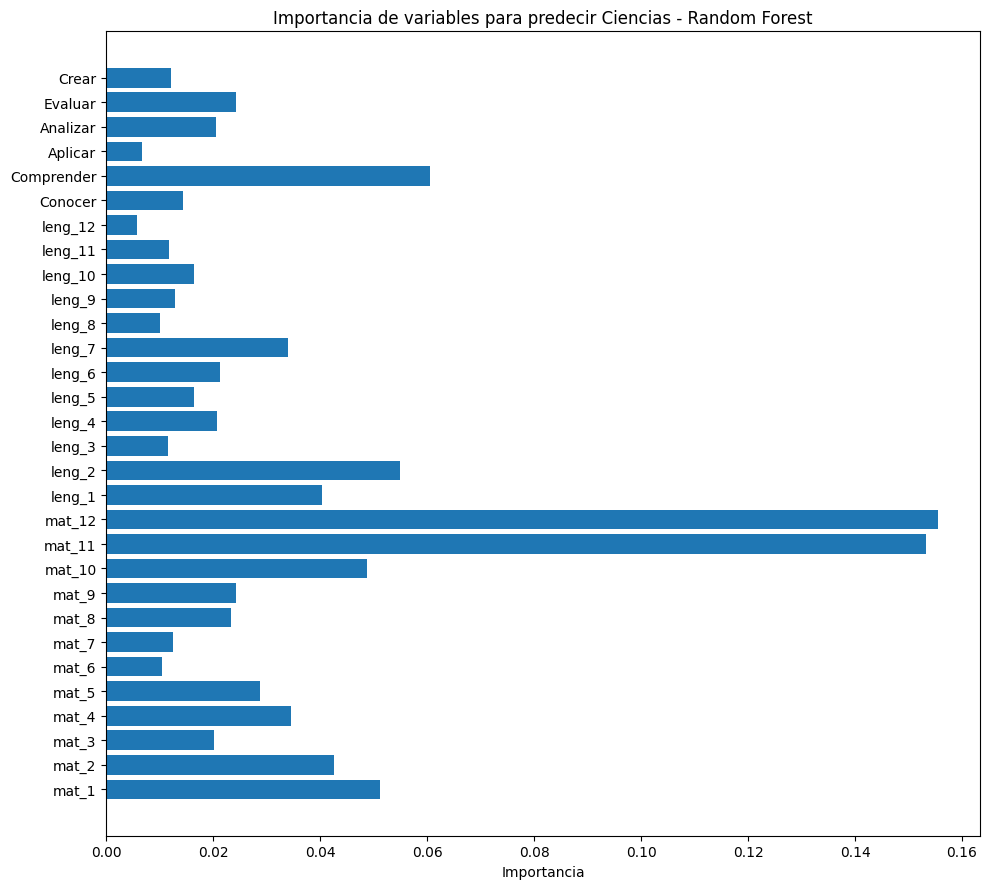

In [37]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = df_datos.drop(columns=['RUT', 'Ciencias']).columns.tolist()

plt.figure(figsize=(10, len(feature_names)*0.3))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de variables para predecir Ciencias - Random Forest")
plt.tight_layout()
plt.show()

## Predecir Historia

In [38]:
df_datos = df.drop(columns=['id', 'Nombre', 'Admisión', 'Matemática', 'Ciencias', 'C. Lectora', 'M2']).copy()
print(f"Cantidad de filas antes de eliminar NaN: {df_datos.shape[0]}")
df_datos.dropna(inplace=True)  # eliminar filas con NaN
print(f"Cantidad de filas después de eliminar NaN: {df_datos.shape[0]}")

X = df_datos.drop(columns=['RUT', 'Historia'])
y = df_datos['Historia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Cantidad de filas antes de eliminar NaN: 323
Cantidad de filas después de eliminar NaN: 229
X_train shape: (183, 30), y_train shape: (183,)
X_test shape: (46, 30), y_test shape: (46,)


Nuevamente hay menos datos.

In [39]:
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Bayesiana': BayesianRidge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'MLP (Neural Net)': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=30000, random_state=42),
    'Ridge': Ridge(alpha=1.0, random_state=42)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    resultados.append({
        'Modelo': nombre,
        'RMSE': round(rmse, 2),
        'R²': round(r2, 3)
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

                Modelo    RMSE     R²
0     Regresión Lineal  103.70  0.079
1  Regresión Bayesiana   88.76  0.325
2        Random Forest   89.55  0.313
3    Gradient Boosting  102.96  0.092
4     MLP (Neural Net)  117.28 -0.178
5                Ridge   91.09  0.290


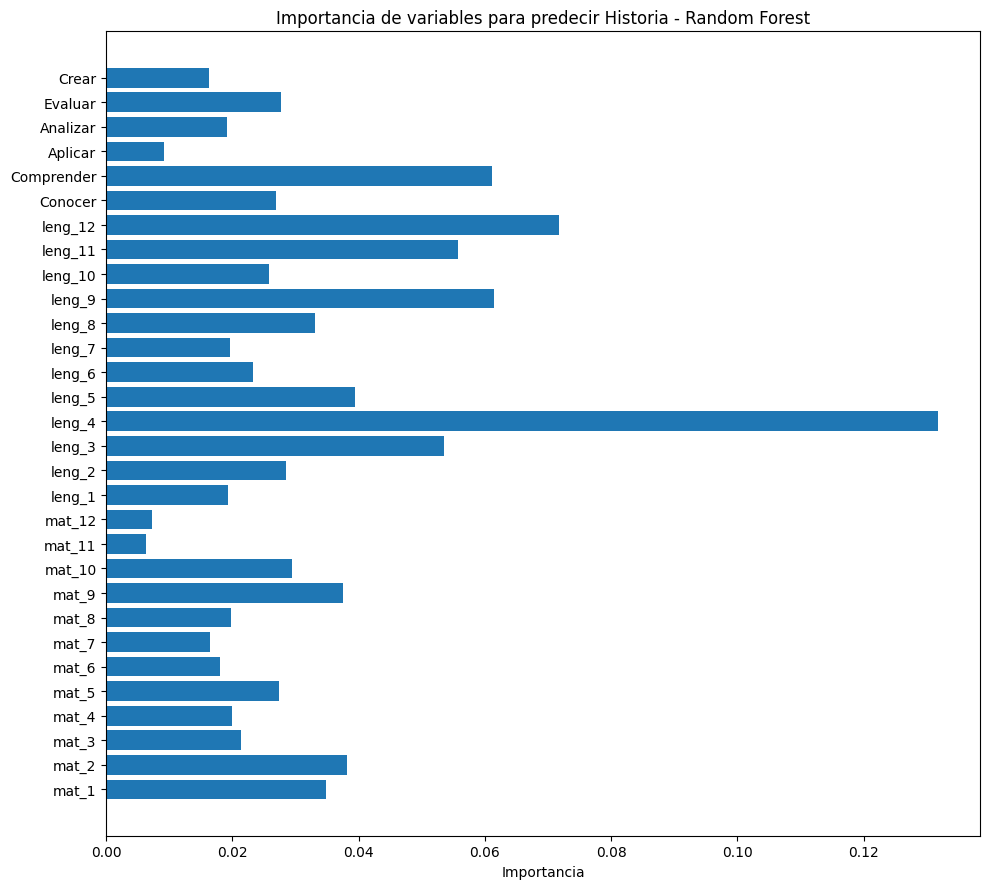

In [41]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = df_datos.drop(columns=['RUT', 'Historia']).columns.tolist()

plt.figure(figsize=(10, len(feature_names)*0.3))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de variables para predecir Historia - Random Forest")
plt.tight_layout()
plt.show()